# 制限値幅がlabelに与える影響

In [46]:
import pickle
import datetime
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DayLocator, DateFormatter
from mpl_finance import candlestick2_ohlc, volume_overlay

from IPython.display import Image

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from tqdm.auto import tqdm

%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 120
warnings.simplefilter('ignore')

In [47]:
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data

In [4]:
# チュートリアルのtrain_X, val_X, test_X, train_y, val_y, test_y　私はpickleで保存しています
# ""の中身はご自身の環境に合わせて定義してください
train_X = pickle_load("...")
val_X = pickle_load("...")
test_X = pickle_load("...")
train_y = pickle_load("...")
val_y = pickle_load("...")
test_y = pickle_load("...")

In [5]:
# データセットの読み込み
# ""の中身はご自身の環境に合わせて定義してください
dataset_dir="..."
inputs = {
    "stock_list": f"{dataset_dir}/stock_list.csv",
    "stock_price": f"{dataset_dir}/stock_price.csv",
    "stock_fin": f"{dataset_dir}/stock_fin.csv",
    "stock_labels": f"{dataset_dir}/stock_labels.csv",
}

dfs = {}
for k, v in inputs.items():
    dfs[k] = pd.read_csv(v)

## 図1.急上昇銘柄

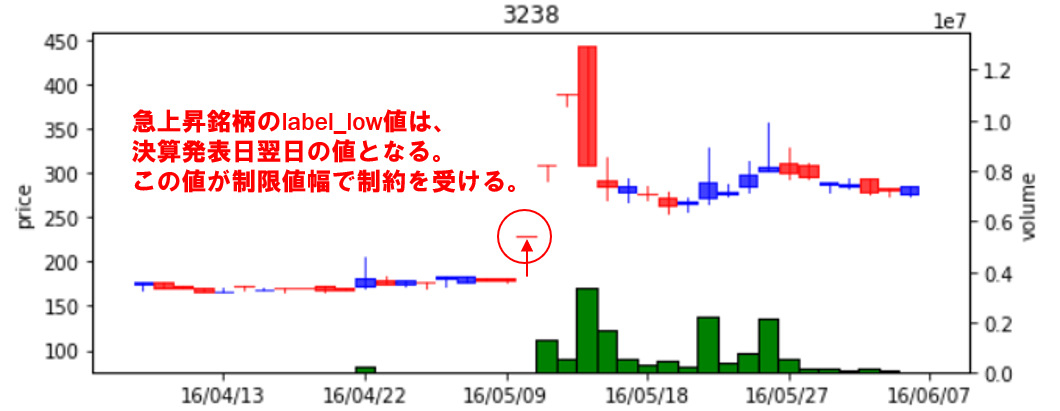

In [48]:
Image("...")

## 図2.急落銘柄

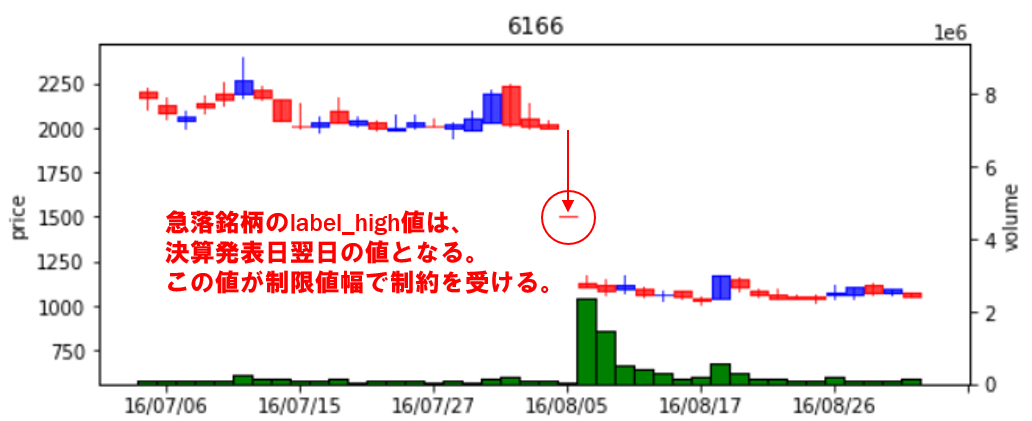

In [49]:
Image("...")

## label_lowと決算発表日の終値の関係

In [53]:
tmp_df = train_X["label_low_20"].copy()
tmp_df["target"] = train_y["label_low_20"]
tmp_df = tmp_df.reset_index()
tmp_df = tmp_df[["datetime", "code", "target"]]
tmp_df = tmp_df.set_index(["datetime", "code"])
tmp_df

,,target
datetime,code,
2016-02-05,1301,-0.05660
2016-05-09,1301,-0.01149
2016-08-05,1301,0.00000
2016-11-04,1301,-0.03967
2017-02-10,1301,0.00401
...,...,...
2017-01-31,9997,0.00774
2017-05-11,9997,0.04205
2017-07-31,9997,-0.13869


In [55]:
tmp_df_price = dfs["stock_price"].copy()
tmp_df_price["datetime"] = pd.to_datetime(tmp_df_price["EndOfDayQuote Date"])
tmp_df_price = tmp_df_price[["datetime", "Local Code", "EndOfDayQuote Close"]]
tmp_df_price.columns = ["datetime", "code", "close"]
tmp_df_price = tmp_df_price.set_index(["datetime", "code"])
tmp_df_price

,,close
datetime,code,
2016-01-04,1301,2750.0
2016-01-05,1301,2760.0
2016-01-06,1301,2760.0
2016-01-07,1301,2710.0
2016-01-08,1301,2700.0
...,...,...
2020-12-24,9997,1025.0
2020-12-25,9997,1065.0
2020-12-28,9997,1072.0


In [57]:
tmp_df_merge = pd.concat([tmp_df, tmp_df_price[tmp_df_price.index.isin(tmp_df.index)]], axis=1)

Text(0, 0.5, 'label_low_20')

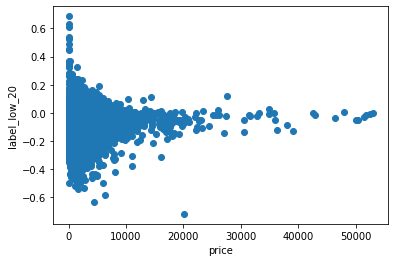

In [60]:
plt.scatter(tmp_df_merge["close"], tmp_df_merge["target"])
plt.xlabel("price")
plt.ylabel("label_low_20")

制限値幅の影響により、価格の低い銘柄（低位株）ではlabel_low_20に大きいものが含まれるようになります（グラフの左上領域）。